### 1.1 Fundamentos de la técnica

El clasificador k-Nearest Neighbors (kNN) es un método de aprendizaje supervisado utilizado para tareas de clasificación y regresión.

No hacen suposiciones previas sobre la estructura del modelo. El modelo se construye a partir de los datos. kNN es un método no paramétrico.

### 1.2 Modelo Matemático de la técnica

La formalización matemática del clasificador kNN es la siguiente:

1.  **Conjunto de Entrenamiento:** Se define como $\mathcal{D}=\{(x_{i},y_{i})\}_{i=1}^{n}$
2.  **Fórmula de Predicción:**  $\hat{y}=modo(\{y_{i}:x_{i}\in\mathcal{N}_{k}(x)\})$
3.  **Métrica de Distancia:** Se requiere una función para medir la similitud. La más común es la **Distancia Euclidiana**:
    $d(x,x^{\prime})=\sqrt{\sum_{j=1}^{d}(x_{j}-x_{j}^{\prime})^{2}}$


Donde $\mathcal{N}_{k}(x)$ representa el conjunto de los 'k' vecinos más cercanos a $x$ en el conjunto de entrenamiento.

### 1.3 Descripción de la librería, clases y funciones

In [1]:
# Manejo de datos y operaciones numéricas
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Preparación de datos (Preprocesamiento)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Normalización

# Modelo de clasificación
from sklearn.neighbors import KNeighborsClassifier

# Métricas de evaluación
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

**Clases clave de `sklearn`:**

* **`train_test_split`:** Función para dividir el dataset en conjuntos de entrenamiento y prueba.
* **`StandardScaler`:** Implementa la normalización **Z-score** ($x_{std}=\frac{x-\mu_{X}}{\sigma_{X}}$). Este paso es fundamental en kNN, ya que las distancias son sensibles a las diferentes escalas de las características.
* **`KNeighborsClassifier`:** Es la implementación del algoritmo kNN. Su parámetro principal es `n_neighbors` (el valor 'k').
* **`confusion_matrix`, `accuracy_score`, `classification_report`:** Funciones para la sección de "Model Evaluation".

### 1.4 Pipeline

#### + Preprocesamiento

Se carga el dataset "Iris" y se realiza un análisis exploratorio inicial.

In [6]:
# 1. Cargar el dataset "Iris"
iris = sns.load_dataset('iris')

# 2. Análisis estadístico y de estructura
display(iris.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Se genera un **Gráfico de Dispersión (Scatter Plot)** para visualizar la separabilidad de las clases usando dos de las características.

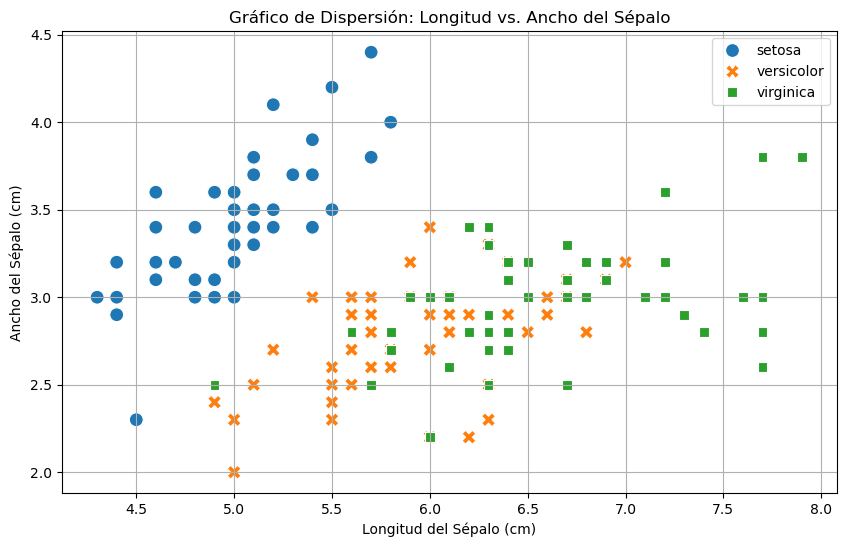

In [7]:
# 3. Gráfico de Dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species', style='species', s=100)
plt.title('Gráfico de Dispersión: Longitud vs. Ancho del Sépalo')
plt.xlabel('Longitud del Sépalo (cm)')
plt.ylabel('Ancho del Sépalo (cm)')
plt.legend()
plt.grid(True)
plt.show()

#### + Feature Engineering 

Se definen las variables de entrada (X) y la variable objetivo (y).

In [8]:
# 1. Seleccionar variables
X = iris.drop('species', axis=1) # Todas las columnas excepto la clase
y = iris['species']              # La columna de clase

print("Forma de X (features):", X.shape)
print("Forma de y (target):", y.shape)

Forma de X (features): (150, 4)
Forma de y (target): (150,)


In [9]:
# 2. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Inicializar y aplicar el escalador
scaler = StandardScaler()

# Se ajusta el escalador (cálculo de media y std) SÓLO con los datos de train
X_train_scaled = scaler.fit_transform(X_train)

# Se aplica la transformación a los datos de test (usando la media y std de train)
X_test_scaled = scaler.transform(X_test)

#### + Model Training 

Se instancia el clasificador `KNeighborsClassifier` y se "entrena" con los datos escalados. El entrenamiento en kNN consiste principalmente en almacenar los datos de entrenamiento en una estructura eficiente.

In [12]:
# Se define el valor de k (número de vecinos)
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Se "entrena" el modelo (almacena los datos de X_train_scaled y y_train)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

#### + Prediction

Se crea una función para predecir la clase de un nuevo patrón, asegurando que se aplique el mismo escalado que se usó en el entrenamiento.

In [17]:
def predecir_flor(sepal_len, sepal_wid, petal_len, petal_wid):
    """
    Predice la especie de una flor Iris aplicando la normalización
    del modelo kNN entrenado.
    """
    # 1. Crear un DataFrame con los mismos nombres que X
    feature_names = X.columns
    patron_nuevo = pd.DataFrame(
        [[sepal_len, sepal_wid, petal_len, petal_wid]], 
        columns=feature_names
    )
    
    # 2. Escalar el patrón
    patron_scaled = scaler.transform(patron_nuevo)
    
    # 3. Realizar la predicción
    prediccion = knn.predict(patron_scaled)
    
    print(f"Patrón de entrada: {patron_nuevo.values[0]}")
    print(f"Clase predecida: {prediccion[0]}")
    
    return prediccion[0]

# Ejemplo de uso de la función
predecir_flor(5.1, 3.5, 1.4, 0.2) # (Datos de una 'setosa')
predecir_flor(6.7, 3.0, 5.2, 2.3) # (Datos de una 'virginica')

Patrón de entrada: [5.1 3.5 1.4 0.2]
Clase predecida: setosa
Patrón de entrada: [6.7 3.  5.2 2.3]
Clase predecida: virginica


'virginica'

#### + Model Evaluation (Métricas)

Se evalúa el rendimiento del modelo utilizando el conjunto de prueba (`X_test_scaled`), que el modelo no ha visto previamente.

In [18]:
# 1. Generar predicciones para todos los datos de prueba
y_pred = knn.predict(X_test_scaled)

print(f"--- Evaluación del Modelo kNN (k={k}) ---")

--- Evaluación del Modelo kNN (k=5) ---


**Matriz de Confusión**
* **Fundamento:** Es una tabla que resume el rendimiento de la clasificación. Compara las etiquetas reales del conjunto de prueba (`y_test`) contra las predicciones del modelo (`y_pred`). La diagonal principal muestra los aciertos (Verdaderos Positivos/Negativos), mientras que los valores fuera de la diagonal representan los errores (Falsos Positivos/Negativos).
* **Algoritmo:** Conteo de frecuencias de cada par (Real, Predicho).

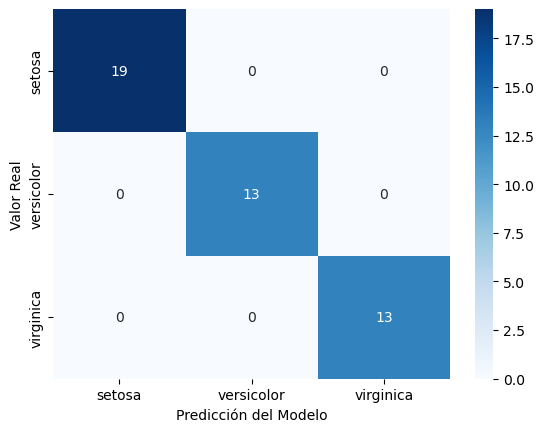

In [19]:
cm = confusion_matrix(y_test, y_pred)

# Visualización de la matriz
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Real')
plt.show()

**Accuracy (Exactitud)**
* **Fundamento:** Mide el porcentaje de predicciones correctas sobre el total de predicciones realizadas.
* **Algoritmo:** $\text{Accuracy} = \frac{\text{Total de Predicciones Correctas}}{\text{Total de Muestras}}$

In [20]:
print("\n2. Accuracy (Exactitud):")
acc = accuracy_score(y_test, y_pred)
print(f"El modelo tuvo una exactitud del {acc * 100:.2f}%.")


2. Accuracy (Exactitud):
El modelo tuvo una exactitud del 100.00%.


**Reporte de Clasificación**
* **Fundamento:** Proporciona un desglose detallado de las métricas clave por cada clase:
    * **Precision:** Mide la exactitud de las predicciones positivas. ($\frac{VP}{VP + FP}$)
    * **Recall (Sensibilidad):** Mide la habilidad del modelo para encontrar todas las muestras positivas. ($\frac{VP}{VP + FN}$)
    * **F1-Score:** Es la media armónica de Precision y Recall, útil para un balance entre ambas.

In [21]:
print("\n3. Reporte de Clasificación:")
report = classification_report(y_test, y_pred)
print(report)


3. Reporte de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### 2. Referencias bibliográficas (APA 7)

Aviña Méndez, J. A. (2025, 26 de marzo). *k-Nearest Neighbors (kNN)*. [Diapositivas de clase]..
